In [4]:
import pandas as pd
from typing import Optional, List, Dict, Any
from langchain_core.tools import tool
from langgraph.types import Command
from typing_extensions import Annotated, TypedDict
from langgraph.prebuilt import InjectedState
from langchain_core.messages import ToolMessage

@tool
def get_column_names(state: Annotated[dict, InjectedState],analysis_type:str) -> List[str]:
    """
    Get all column names from a pandas DataFrame stored in the state.

    Args:
        state (dict): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.

    Returns:
        List[str]: A list of column names from the DataFrame.
    """
    print("00000000000000000000000000")
    print(state)
    if analysis_type=="initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])
    print(dataframe.columns.tolist())
    # 返回所有列名
    return dataframe.columns.tolist()

@tool
def show_dataframe_head(state: Annotated[dict, InjectedState], analysis_type: str) -> List[List[Any]]:
    """
    Show the first 5 rows of a pandas DataFrame stored in the state.

    Args:
        state (dict): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.

    Returns:
        List[List[Any]]: A list of lists representing the first 5 rows of the DataFrame.
    """
    print("00000000000000000000000000")
    print(state)
    
    # 根据analysis_type从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])
        
    # 获取DataFrame的前5行
    head_rows = dataframe.head().values.tolist()
    print(head_rows)
    
    # 返回前5行数据
    return head_rows

@tool
def calculate_statistics(
    state: Annotated[dict, InjectedState],
    column_name: str,
    analysis_type:str,
    methods: List[str] = ["mean", "variance",
                          "std_dev", "min", "max", "median"],
) -> Dict[str, float]:
    """
    Calculate statistics for a specific column in a pandas DataFrame stored in the state.

    Args:
        state (dict): A dictionary containing the key "dataframe" with a pandas DataFrame.
        column_name (str): The name of the column to calculate statistics for.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        methods (List[str], optional): A list of statistical methods to compute. Defaults to ["mean", "variance", "std_dev", "min", "max", "median"].

    Returns:
        Dict[str, float]: A dictionary of calculated statistics with method names as keys and computed values as float values.
    """
    print("1111111111111111111111111111111")
    if analysis_type=="initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])
    # 确保列名存在于数据中
    if column_name not in dataframe.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

    # 计算统计值
    results = {}

    if "mean" in methods:
        results["mean"] = dataframe[column_name].mean()

    if "variance" in methods:
        results["variance"] = dataframe[column_name].var()

    if "std_dev" in methods:
        results["std_dev"] = dataframe[column_name].std()

    if "min" in methods:
        results["min"] = dataframe[column_name].min()

    if "max" in methods:
        results["max"] = dataframe[column_name].max()

    if "median" in methods:
        results["median"] = dataframe[column_name].median()

    if "sum" in methods:
        results["sum"] = dataframe[column_name].sum()

    if "count" in methods:
        results["count"] = dataframe[column_name].count()

    if "kurtosis" in methods:
        results["kurtosis"] = dataframe[column_name].kurtosis()
    return results


@tool
def calculate_pairwise_statistics(
    state: Annotated[dict, InjectedState],
    column1: str,
    column2: str,
    analysis_type:str,
    methods: List[str] = ["pearson", "covariance", "spearman",
                          "kendall", "correlation", "covariance_matrix"]
) -> Dict[str, float]:
    """
    Calculate statistics for a pair of columns in a pandas DataFrame stored in the state.

    Args:
        state (dict): A dictionary containing the key "dataframe" with a pandas DataFrame.
        column1 (str): The name of the first column for pairwise statistics.
        column2 (str): The name of the second column for pairwise statistics.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        methods (List[str], optional): A list of statistical methods to compute for the pair of columns. Defaults to ["pearson", "covariance", "spearman", "kendall", "correlation", "covariance_matrix"].

    Returns:
        Dict[str, float]: A dictionary of calculated statistics with method names as keys and computed values as float values or other relevant data types.
    """
    print("22222222222222222222222222")
    if analysis_type=="initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])
    # 确保列名存在于数据中
    if column1 not in dataframe.columns or column2 not in dataframe.columns:
        raise ValueError(
            f"Columns '{column1}' and/or '{column2}' not found in the DataFrame.")

    # 提取两个列的数据
    col1_data = dataframe[column1]
    col2_data = dataframe[column2]

    # 计算统计值
    results = {}

    # 皮尔逊相关系数
    if "pearson" in methods:
        results["pearson"] = col1_data.corr(col2_data, method="pearson")

    # 协方差
    if "covariance" in methods:
        results["covariance"] = col1_data.cov(col2_data)

    # Spearman 等级相关系数
    if "spearman" in methods:
        results["spearman"] = col1_data.corr(col2_data, method="spearman")

    # Kendall Tau 相关系数
    if "kendall" in methods:
        results["kendall"] = col1_data.corr(col2_data, method="kendall")

    # 相关性（计算列之间的相关系数）
    if "correlation" in methods:
        results["correlation"] = col1_data.corr(col2_data)

    # 协方差矩阵
    if "covariance_matrix" in methods:
        covariance_matrix = dataframe[[column1, column2]].cov()
        results["covariance_matrix"] = covariance_matrix.to_dict()

    # 计算皮尔逊相关系数的p值（对于显著性测试）
    if "pearson_p_value" in methods:
        from scipy.stats import pearsonr
        corr, p_value = pearsonr(col1_data, col2_data)
        results["pearson_p_value"] = p_value

    return results


# ##################################################################################
@tool
def remove_nans(
    state: Annotated[dict, InjectedState],
    analysis_type:str,
    column_names: List[str]
) -> Dict[str, str]:
    """
    Remove rows with NaN values in specified columns of a pandas DataFrame stored in the state.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        column_names (List[str]): A list of column names to check for NaNs and remove rows accordingly.

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 从state中读取DataFrame
    if analysis_type=="initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 确保所有提供的列名都存在于数据中
    non_existent_columns = [col for col in column_names if col not in dataframe.columns]
    if non_existent_columns:
        raise ValueError(f"Columns {non_existent_columns} not found in the DataFrame.")

    # 对于每个指定的列，去除含有NaN值的行
    original_row_count = len(dataframe)
    for column in column_names:
        dataframe = dataframe.dropna(subset=[column])


    # 将清理后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # update the state keys
            "middle_dataframe": dataframe,
            # update the message history
            "messages": [ToolMessage("Null value in dataframe successfully removed")]
        }
    )

@tool
def extract_columns(
    state: Annotated[dict, InjectedState],
    analysis_type: str,
    column_names: List[str]
) -> Dict[str, str]:
    """
    Extract specified columns from a pandas DataFrame stored in the state.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        column_names (List[str]): A list of column names to extract from the DataFrame.

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 确保所有提供的列名都存在于数据中
    non_existent_columns = [col for col in column_names if col not in dataframe.columns]
    if non_existent_columns:
        raise ValueError(f"Columns {non_existent_columns} not found in the DataFrame.")

    # 提取指定的列
    extracted_dataframe = dataframe[column_names]

    # 将提取后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # update the state keys
            "middle_dataframe": extracted_dataframe,
            # update the message history
            "messages": [ToolMessage("Columns successfully extracted from dataframe")]
        }
    )
    
@tool
def groupby_column(
    state: Annotated[dict, InjectedState],
    analysis_type: str,
    column_name: str,
    groupby_condition: str,
    aggregation: Dict[str, Any]
) -> Dict[str, str]:
    """
    Group a DataFrame by a specified column and apply aggregation based on a condition.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        column_name (str): The column name to group by.
        groupby_condition (str): A condition to filter the DataFrame before grouping (e.g., "column_name > 10").
        aggregation (Dict[str, Any]): A dictionary specifying the aggregation operations to apply (e.g., {"column_name": "sum"}).

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 检查指定的列是否存在
    if column_name not in dataframe.columns:
        raise ValueError(f"Column {column_name} not found in the DataFrame.")

    # 根据条件过滤DataFrame
    filtered_dataframe = dataframe.query(groupby_condition)

    # 对过滤后的DataFrame进行分组和聚合操作
    grouped_dataframe = filtered_dataframe.groupby(column_name).agg(aggregation).reset_index()

    # 将分组后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # update the state keys
            "middle_dataframe": grouped_dataframe,
            # update the message history
            "messages": [ToolMessage("DataFrame successfully grouped and aggregated")]
        }
    )
    
@tool   
def filter_dataframe(
    state: Annotated[dict, InjectedState],
    analysis_type: str,
    filter_condition: str
) -> Dict[str, str]:
    """
    Filter a DataFrame based on a specified condition.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        filter_condition (str): A condition to filter the DataFrame (e.g., "column_name > 10").

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 根据analysis_type从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 使用给定的过滤条件过滤DataFrame
    try:
        filtered_dataframe = dataframe.query(filter_condition)
    except Exception as e:
        return {
            "status": "error",
            "message": f"Error during filtering: {str(e)}"
        }

    # 将过滤后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # 更新状态键值
            "middle_dataframe": filtered_dataframe.to_json(),
            # 更新消息历史
            "messages": [ToolMessage("DataFrame successfully filtered")]
        }
    )
@tool    
def rename_columns(
    state: Annotated[dict, InjectedState],
    analysis_type: str,
    rename_mapping: Dict[str, str]
) -> Dict[str, str]:
    """
    Rename specified columns in a DataFrame.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        rename_mapping (Dict[str, str]): A dictionary mapping of old column names to new column names.

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 检查所有待重命名的列是否存在
    for old_name in rename_mapping.keys():
        if old_name not in dataframe.columns:
            raise ValueError(f"Column {old_name} not found in the DataFrame.")

    # 重命名DataFrame中的列
    dataframe.rename(columns=rename_mapping, inplace=True)

    # 将更新后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # 更新状态键值
            "middle_dataframe": dataframe.to_json(),
            # 更新消息历史
            "messages": [ToolMessage("DataFrame successfully updated with renamed columns")]
        }
    )    
@tool
def sort_by_column(
    state: Annotated[dict, InjectedState],
    analysis_type: str,
    column_name: str,
    ascending: bool = True
) -> Dict[str, str]:
    """
    Sort a DataFrame by a specified column.

    Args:
        state (Dict[str, Any]): A dictionary containing the key "dataframe" with a pandas DataFrame.
        analysis_type (str): Indicates which DataFrame to use. Use 'initial' for the original dataframe and 'processing' for the intermediate dataframe.
        column_name (str): The column name to sort by.
        ascending (bool): Whether to sort in ascending order. Default is True.

    Returns:
        Dict[str, str]: A dictionary indicating the success of the operation and a message.
    """
    # 从state中读取DataFrame
    if analysis_type == "initial":
        dataframe = pd.read_json(state["dataframe"])
    else:
        dataframe = pd.read_json(state["middle_dataframe"])

    # 检查指定的列是否存在
    if column_name not in dataframe.columns:
        raise ValueError(f"Column {column_name} not found in the DataFrame.")

    # 根据指定列名对DataFrame进行排序
    sorted_dataframe = dataframe.sort_values(by=column_name, ascending=ascending).reset_index(drop=True)

    # 将排序后的DataFrame转换回JSON字符串并更新到state
    return Command(
        update={
            # 更新状态键值
            "middle_dataframe": sorted_dataframe.to_json(),
            # 更新消息历史
            "messages": [ToolMessage(f"DataFrame successfully sorted by {column_name}")]
        }
    )

In [5]:
from asyncio.windows_events import NULL
from unicodedata import name
import uuid
import shutil
from typing import Annotated, Literal, Optional, List, Tuple, Union, Callable
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict
from langgraph.graph.message import AnyMessage, add_messages
from langchain_anthropic import ChatAnthropic
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig
from datetime import datetime
from langchain_core.tools import tool
from pydantic import BaseModel, Field
import operator
import asyncio
import pandas as pd
from scipy import stats
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph
from langgraph.prebuilt import tools_condition
from langchain_core.messages import ToolMessage
from langgraph.graph import StateGraph, START, END
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda
from langgraph.prebuilt import ToolNode
# from tools import calculate_statistics, calculate_pairwise_statistics, get_column_names, show_dataframe_head
# from tools import remove_nans, extract_columns, groupby_column, filter_dataframe, rename_columns, sort_by_column
from langchain_core.tools import tool
from typing import Optional, List, Dict


# tools:
# @tool
# def calculate_dataframe_column_stats(dataframe: pd.DataFrame, column: str) -> dict:
#     """
#     Calculate the maximum, minimum, mean, median, and mode of a column in the dataframe.

#     Args:
#         dataframe (pd.DataFrame): The dataframe containing the data.
#         column (str): The column name to calculate the statistics for.

#     Returns:
#         dict: A dictionary containing the maximum, minimum, mean, median, and mode of the column.
#     """
#     # Ensure the column exists in the dataframe
#     if column not in dataframe.columns:
#         raise ValueError(f"Column '{column}' not found in the dataframe")

#     # Calculate statistics for the specified column
#     max_value = dataframe[column].max()
#     min_value = dataframe[column].min()
#     mean_value = dataframe[column].mean()
#     median_value = dataframe[column].median()
#     mode_value = stats.mode(dataframe[column])[0][0]  # Mode returns an array, we take the first element

#     # Create the result dictionary
#     result = {
#         "max": max_value,
#         "min": min_value,
#         "mean": mean_value,
#         "median": median_value,
#         "mode": mode_value
#     }

#     return result


def update_dialog_stack(left: list[str], right: Optional[str]) -> list[str]:
    """Push or pop the state."""
    if right is None:
        return left
    if right == "pop":
        return left[:-1]
    return left + [right]
# 计划步骤


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    input: str
    plan: List[str]
    past_steps: Annotated[List[Tuple], operator.add]
    response: str
    file_path: Optional[str]
    dataframe:pd.DataFrame
    middle_dataframe:pd.DataFrame

# class State(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]
#     dialog_state: Annotated[
#         list[
#             Literal[
#                 "assistant",
#                 "update_flight",
#                 "book_car_rental",
#                 "book_hotel",
#                 "book_excursion",
#             ]
#         ],
#         update_dialog_stack,
#     ]


class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            result = self.runnable.invoke(state)

            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + \
                    [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}


class CompleteOrEscalate(BaseModel):
    """A tool to mark the current task as completed and/or to escalate control of the dialog to the main assistant, who can re-route the dialog based on the user's needs."""

    cancel: bool = True
    reason: str

    class Config:
        json_schema_extra = {
            "example": {
                "cancel": True,
                "reason": "User changed their mind about the current task.",
            },
            "example 2": {
                "cancel": True,
                "reason": "I have fully completed the task.",
            },
            "example 3": {
                "cancel": False,
                "reason": "I need to search the user's emails or calendar for more information.",
            },
        }

# utils


def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }


def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )


def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print("Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)


def create_entry_node(assistant_name: str, new_dialog_state: str) -> Callable:
    def entry_node(state: State) -> dict:
        tool_call_id = state["messages"][-1].tool_calls[0]["id"]
        return {
            "messages": [
                ToolMessage(
                    content=f"The assistant is now the {assistant_name}. Reflect on the above conversation between the host assistant and the user."
                    f" The user's intent is unsatisfied. Use the provided tools to assist the user. Remember, you are {assistant_name},"
                    " and the booking, update, other other action is not complete until after you have successfully invoked the appropriate tool."
                    " If the user changes their mind or needs help for other tasks, call the CompleteOrEscalate function to let the primary host assistant take control."
                    " Do not mention who you are - just act as the proxy for the assistant.",
                    tool_call_id=tool_call_id,
                )
            ],
            "dialog_state": new_dialog_state,
        }

    return entry_node


class Plan(BaseModel):
    """Plan to follow in future"""

    steps: List[str] = Field(
        description="different steps to follow, should be in sorted order"
    )


planner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. Conventional planning involves obtaining various statistical data of data through tools to understand the data, and then mining data insights. You can refine the steps of data analysis through domain knowledge. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.""",
        ),
        ("placeholder", "{messages}"),
    ]
)
planner = planner_prompt | ChatOpenAI(
    model="gpt-4o", temperature=0
).with_structured_output(Plan)


def plan_step(state: State):
    content = state['messages'][-1].content
    plan = planner.invoke({"messages": [("user", content)]})
    return {"plan": plan.steps}


# 重计划步骤
class Response(BaseModel):
    """Response to user."""

    response: str


class Act(BaseModel):
    """Action to perform."""

    action: Union[Response, Plan] = Field(
        description="Action to perform. If you want to respond to user, use Response. "
        "If you need to further use tools to get the answer, use Plan."
    )


replanner_prompt = ChatPromptTemplate.from_template(
    """For the given objective, come up with a simple step by step plan. \
This plan should involve individual tasks, that if executed correctly will yield the correct answer. Do not add any superfluous steps. \
The result of the final step should be the final answer. Make sure that each step has all the information needed - do not skip steps.

Your objective was this:
{input}

Your original plan was this:
{plan}

You have currently done the follow steps:
{past_steps}

Update your plan accordingly. If no more steps are needed and you can return to the user, then respond with that. Otherwise, fill out the plan. Only add steps to the plan that still NEED to be done. Do not return previously done steps as part of the plan."""
)
replanner = replanner_prompt | ChatOpenAI(
    model="gpt-4o", temperature=0
).with_structured_output(Act)


def replan_step(state: State):
    output = replanner.invoke(state)
    if isinstance(output.action, Response):
        return {}
    else:
        return {"plan": output.action.steps}


error_corrector_prompt = ChatPromptTemplate.from_template(
    """
    You are a data interface data provider. Your final output needs to be input for a data interface, so your final output must strictly adhere to the following format:
    {{
        "reply": "string", // Any message you want to convey that is not related to graphs_grammar and recommendation.
        "graphs_grammar?": "list", // Formal language for drawing charts using the visualization chart library.
        "recommendation": "string[]" // List of next interactions, no more than three options, including the option to "end exploration".
    }}
    Please ensure that your response matches this structure exactly, as it will be directly consumed by the data interface. The reply field should contain any messages or insights not directly tied to the visualizations or recommendations. The graphs_grammar field (which is optional, as indicated by the "?") should provide instructions in a formal language used by the visualization library to draw charts. Lastly, the recommendation field should list up to three possible next steps, one of which can be to "end exploration".

    For example, Your input is:
    数据分析结果如下：

    1. **申请人数 (Apps)**:
    - 平均值: 3001.64
    - 方差: 14978459.53
    - 标准差: 3870.20
    - 最小值: 81
    - 最大值: 48094
    - 中位数: 1558.0

    2. **录取人数 (Accept)**:
    - 平均值: 2018.80
    - 方差: 6007959.70
    - 标准差: 2451.11
    - 最小值: 72
    - 最大值: 26330
    - 中位数: 1110.0

    3. **入学人数 (Enroll)**:
    - 平均值: 779.97
    - 方差: 863368.39
    - 标准差: 929.18
    - 最小值: 35
    - 最大值: 6392
    - 中位数: 434.0

    4. **州外学费 (Outstate)**:
    - 平均值: 10440.67
    - 方差: 16184661.63
    - 标准差: 4023.02
    - 最小值: 2340
    - 最大值: 21700
    - 中位数: 9990.0

    5. **毕业率 (Grad.Rate)**:
    - 平均值: 65.46
    - 方差: 295.07
    - 标准差: 17.18
    - 最小值: 10
    - 最大值: 118
    - 中位数: 65.0

    这些统计数据揭示了申请、录取和入学人数的分布情况，以及州外学费和毕业率的差异。接下来，我将为这些 
    数据创建可视化图表，以便更好地理解和分析。

    接下来，我将为这些数据创建可视化图表，以便更好地理解和分析。
    {{
        "reply": "数据揭示了申请、录取和入学人数的分布。",
        "graphs_grammar": [
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "5%",
                    "top": "5%"
                }},
                "x": "Unnamed: 0",
                "y": "Apps",
                "interactionType": "filter_01",
                "interactionKey": "Apps",
                "allowedInteractionType": "filter_02"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "50%",
                    "top": "5%"
                }},
                "x": "Unnamed: 0",
                "y": "Accept",
                "interactionType": "filter_02",
                "interactionKey": "Accept",
                "allowedInteractionType": "filter_01"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "5%",
                    "top": "50%"
                }},
                "x": "Unnamed: 0",
                "y": "Enroll",
                "interactionType": "filter_03",
                "interactionKey": "Enroll",
                "allowedInteractionType": "filter_04"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "50%",
                    "top": "50%"
                }},
                "x": "Unnamed: 0",
                "y": "Outstate",
                "interactionType": "filter_04",
                "interactionKey": "Outstate",
                "allowedInteractionType": "filter_03"
            }}
        ],
        "recommendation": ["分析录取率与毕业率的关系", "探索州外学费对入学人数的影响", "结束探索"]   
    }}
    
    your output should be:
    {{
        "reply": "数据分析结果如下：

        1. **申请人数 (Apps)**:
        - 平均值: 3001.64
        - 方差: 14978459.53
        - 标准差: 3870.20
        - 最小值: 81
        - 最大值: 48094
        - 中位数: 1558.0

        2. **录取人数 (Accept)**:
        - 平均值: 2018.80
        - 方差: 6007959.70
        - 标准差: 2451.11
        - 最小值: 72
        - 最大值: 26330
        - 中位数: 1110.0

        3. **入学人数 (Enroll)**:
        - 平均值: 779.97
        - 方差: 863368.39
        - 标准差: 929.18
        - 最小值: 35
        - 最大值: 6392
        - 中位数: 434.0

        4. **州外学费 (Outstate)**:
        - 平均值: 10440.67
        - 方差: 16184661.63
        - 标准差: 4023.02
        - 最小值: 2340
        - 最大值: 21700
        - 中位数: 9990.0

        5. **毕业率 (Grad.Rate)**:
        - 平均值: 65.46
        - 方差: 295.07
        - 标准差: 17.18
        - 最小值: 10
        - 最大值: 118
        - 中位数: 65.0

        这些统计数据揭示了申请、录取和入学人数的分布情况，以及州外学费和毕业率的差异。数据揭示了申请、录取和入学人数的分布。",
        "graphs_grammar": [
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "5%",
                    "top": "5%"
                }},
                "x": "Unnamed: 0",
                "y": "Apps",
                "interactionType": "filter_01",
                "interactionKey": "Apps",
                "allowedInteractionType": "filter_02"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "50%",
                    "top": "5%"
                }},
                "x": "Unnamed: 0",
                "y": "Accept",
                "interactionType": "filter_02",
                "interactionKey": "Accept",
                "allowedInteractionType": "filter_01"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "5%",
                    "top": "50%"
                }},
                "x": "Unnamed: 0",
                "y": "Enroll",
                "interactionType": "filter_03",
                "interactionKey": "Enroll",
                "allowedInteractionType": "filter_04"
            }},
            {{
                "name": "BarVertical",
                "meta": {{
                    "width": "45%",
                    "height": "40%",
                    "left": "50%",
                    "top": "50%"
                }},
                "x": "Unnamed: 0",
                "y": "Outstate",
                "interactionType": "filter_04",
                "interactionKey": "Outstate",
                "allowedInteractionType": "filter_03"
            }}
        ],
        "recommendation": ["分析录取率与毕业率的关系", "探索州外学费对入学人数的影响", "结束探索"]   
    }}
    
    Example2, Your input is:
    "请你给我一些详细讲解"
    your output should be:
    {{
        "reply":"请你给我一些详细讲解",
        "graphs_grammar":[],
        "recommendation":[]
    }}

    Now, your input is :
    {ini_result}
    """
)
error_corrector = error_corrector_prompt | ChatOpenAI(
    model="gpt-4o", temperature=0
).with_structured_output(Response)


def error_correct_step(state: State):
    ini_result = state["messages"][-1].content
    state["ini_result"] = ini_result
    output = error_corrector.invoke(state)
    return {"response": output.response}


data_constructor_prompt = ChatPromptTemplate.from_messages([
    (
        "system",
        """**Data Analysis Orchestrator v2.1**
        
# Mission Profile
You are an autonomous data analysis engine designed to perform professional-grade data operations. Strictly follow this pipeline:

[PHASE 1: DATA CONTEXTUALIZATION]
1. Requisition Clarification: 
   - Parse: {messages}
   - Validate scope with user if ambiguity >15%
   
2. Data Ontology Mapping:
   ↳ Execute `get_column_names` → Establish schema blueprint
   ↳ Run `calculate_statistics` → Capture baseline metrics

[PHASE 2: EXPLORATORY ANALYSIS PLAN]
3. Hypothesis Generation:
   - Identify 3-5 key dimensions for deep analysis 
   - Highlight potential data quality flags using `show_dataframe_head`
   - Propose 2-3 non-obvious analytical angles

4. Tool Selection Matrix:
   Prioritize operations:
   - Data Sanitization: `remove_nans` → `filter_dataframe`
   - Feature Engineering: `extract_columns` → `groupby_column`
   - Dimensional Analysis: `calculate_pairwise_statistics` + `sort_by_column`

[PHASE 3: INTELLIGENT TRANSFORMATION]
5. Adaptive Preprocessing:
   - Apply `rename_columns` for semantic normalization
   - Validate distribution shifts post-transformation
   - Maintain data lineage through versioned operations

6. Strategic Output Packaging:
   - Select optimal visualization anchors
   - Prepare 2-3 actionable insights with confidence intervals
   - Generate data dictionary for transformed schema

# Execution Protocols
- Data Conservation: Always preserve raw data copies
- Statistical Significance: Validate n≥30 for parametric tests
- Transparency: Log all transformation decisions
- Fallback: Use `TavilySearchResults` for domain context when feature meaning is ambiguous

Current Operational Context: {time}"""
    ),
    ("placeholder", "{messages}"),
]).partial(time=datetime.now)

data_constructor_tools = [
    TavilySearchResults(max_results=2),
    calculate_statistics,
    calculate_pairwise_statistics,
    get_column_names,
    remove_nans, extract_columns, groupby_column, filter_dataframe, rename_columns, sort_by_column,
    show_dataframe_head
]
llm1 = ChatOpenAI(model="gpt-4o", temperature=0)
data_constructor_runnable = data_constructor_prompt | llm1.bind_tools(
    data_constructor_tools
)
# 主agent
primary_assistant_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a specialized assistant for data analyst. "
            "\n\nIf the user needs help, and none of your tools are appropriate for it, then"
            ' "CompleteOrEscalate" the dialog to the host assistant. Do not waste the user\'s time. Do not make up invalid tools or functions.'
            "\n\nThe user has provided the dataframe"
            """
            You are now a data analyst, and your task is to perform tasks step-by-step according to the execution plan, analyze the data to uncover deep insights, and then generate visualizations to present to users. I will provide you with the syntax for the visualization chart library, and you need to generate a brief summary, create the corresponding visualization grammar, and offer recommendations for the next steps in analysis.
            Note that when you perform data analysis and draw visual charts, you MUST rely on the intermediate results of the previous data analysis. You can perceive the intermediate results of the data analysis through functions such as calculate_statistics, calculate_pairwise_statistics, get_column_names, and show_dataframe_head.
            Note that you should adhere to the relevant design principles of the visualization grammar, and if you do not know them, you should refer to these principles.
            When you have completed the data analysis and decide to enter the replan phase, your output format should be:
            {{
                "reply": "string" // A summary of data analysis not exceeding 50 characters.
                "graphs_grammar?": "list" // Formal language for drawing charts using the visualization chart library.
                "recommendation": "string[]" // List of next interactions, no more than three options, including the option to "end exploration".
            }}
            Note that if you do not wish to redraw the graphs, your reply should not include graphs_grammar.
            The syntax for the statistical charts in the visualization chart library is as follows:
            Statistical charts:
            {{
                "name": "chart_type",
                "meta": {{
                    "width": "The percentage of width of the chart relative to the main interface",
                    "height": "The percentage of height of the chart relative to the main interface",
                    "left": "Position the pixel in the upper left corner of the chart relative to the left boundary, using CSS percentage positioning",
                    "top": "Position the pixel in the upper left corner of the chart relative to the upper boundary, using CSS percentage positioning"
                }},
                "x": "Data Column",
                "y": "Data Column",
                "z": "Data Column (Only available for scatter plots)",
                "interactionType": "The ID of the interaction signal, such as filter_01",
                "interactionKey": "The corresponding data column of the interaction signal. This data column must be in x or y",
                "allowedInteractionType": "The ID of an acceptable interaction signal, where there is an interaction signal, there must be an acceptable interaction signal."
            }},
            chart_type includes 'Scatter' (scatter plot), 'ArcDiagram' (arc diagram), 'Donat' (donut chart), 'Line' (line chart), 'BarRight' (horizontal bar chart), 'BarVertical' (vertical bar chart).
            Here's an example output:
            {{
                "reply": "Data shows a significant decline in the recent stock market.",
                "graphs_grammar": [
                    {{
                    "name": "ArcDiagram",
                    "meta": {{
                        "width": "60%",
                        "height": "60%",
                        "left": "15%",
                        "top": "5%"
                    }},
                    "interactionType": "filter_01",
                    "interactionKey": "height",
                    "allowedInteractionType": "filter_02"
                    }},
                    {{
                    "name": "BarRight",
                    "meta": {{
                        "width": "40%",
                        "height": "20%",
                        "left": "15%",
                        "top": "5%"
                    }},
                    "x": "year",
                    "y": "height",
                    "interactionType": "filter_02",
                    "interactionKey": "height",
                    "allowedInteractionType": "filter_01"
                    }}
                ],
                "recommendation": ["Are there any major news items related to the shipbuilding industry recently?", "What is the situation with stocks related to the shipbuilding industry?", "End exploration"]
            }}
            
            Note that your final output needs to be input for a data interface, so your final output must strictly adhere to the following format:
            {{
                "reply": "string", // Any message you want to convey that is not related to graphs_grammar and recommendation.
                "graphs_grammar?": "list", // Formal language for drawing charts using the visualization chart library.
                "recommendation": "string[]" // List of next interactions, no more than three options, including the option to "end exploration".
            }}
            Please ensure that your response matches this structure exactly, as it will be directly consumed by the data interface. The reply field should contain any messages or insights not directly tied to the visualizations or recommendations. The graphs_grammar field (which is optional, as indicated by the "?") should provide instructions in a formal language used by the visualization library to draw charts. Lastly, the recommendation field should list up to three possible next steps, one of which can be to "end exploration".
            """,
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now)


primary_assistant_tools = [
    TavilySearchResults(max_results=2),
    calculate_statistics,
    calculate_pairwise_statistics,
    get_column_names,
    show_dataframe_head
]


class ToCorrector(BaseModel):
    """Transfer the work to the corrector assistant. """

    request: str = Field(
        description="After completing the task analysis, determine whether it is correct."
    )


class ToPrimaryAssistant(BaseModel):
    """Transfer the work to the primary assistant. """

    request: str = Field(
        description="Transfer the work to the primary assistant."
    )

llm2 = ChatOpenAI(model="gpt-4o", temperature=0)
assistant_runnable = primary_assistant_prompt | llm1.bind_tools(
    primary_assistant_tools
    + [ToCorrector]
)

# 构建图
builder = StateGraph(State)
builder.add_node("plan_step", plan_step)

builder.add_node("data_constructor", Assistant(data_constructor_runnable))
builder.add_node("data_constructor_tools",
                 create_tool_node_with_fallback(data_constructor_tools))


builder.add_node(
    "enter_primary_assistant",
    create_entry_node("primary assistant", "primary assistant"),
)
builder.add_node("primary_assistant", Assistant(assistant_runnable))
builder.add_node("primary_assistant_tools",
                 create_tool_node_with_fallback(primary_assistant_tools))
builder.add_node(
    "enter_replan",
    create_entry_node("enter replan", "enter_replan"),
)
builder.add_node("replan", replan_step)
builder.add_node("error_correction", error_correct_step)



def route_data_constructor(
    state: State,
):
    route = tools_condition(state)
    if route == END:
        return "error_correction"
    if route == "primary_assistant":
        return "primary_assistant"
    tool_calls = state["messages"][-1].tool_calls
    if tool_calls:
        return "primary_assistant_tools"
    raise ValueError("Invalid route")
def route_primary_assistant(
    state: State,
):
    route = tools_condition(state)
    if route == END:
        return "error_correction"
    tool_calls = state["messages"][-1].tool_calls
    if tool_calls:
        if tool_calls[0]["name"] == ToCorrector.__name__:
            return "error_correction"
        return "primary_assistant_tools"
    raise ValueError("Invalid route")

def route_to_workflow(
    state: State,
) -> Literal[
    "primary_assistant",
]:
    """If we are in a delegated state, route directly to the appropriate assistant."""
    dialog_state = state.get("dialog_state")
    if not dialog_state:
        return "primary_assistant"
    return dialog_state[-1]


def route_replan_assistant(
    state: State,
):
    route = tools_condition(state)
    if route == END:
        return END
    tool_calls = state["messages"][-1].tool_calls
    if tool_calls:
        if tool_calls[0]["name"] == ToPrimaryAssistant.__name__:
            return "enter_primary_assistant"
    raise ValueError("Invalid route")


builder.add_edge(START, "plan_step")
builder.add_edge("plan_step", "data_constructor")

builder.add_conditional_edges(
    "data_constructor",
    route_data_constructor,
    [
        "primary_assistant",
        "data_constructor_tools",
        "error_correction"
    ],
)


builder.add_edge("data_constructor_tools", "data_constructor")
builder.add_edge("data_constructor", "primary_assistant")
builder.add_edge("enter_primary_assistant", "primary_assistant")
builder.add_conditional_edges(
    "primary_assistant",
    route_primary_assistant,
    [
        "error_correction",
        "primary_assistant_tools",
        END
    ],
)
builder.add_edge("error_correction", END)
builder.add_edge("primary_assistant_tools", "primary_assistant")

# builder.add_edge("enter_replan", "replan")

# builder.add_conditional_edges(
#     "replan",
#     route_replan_assistant,
#     [
#         "enter_primary_assistant",
#         END,
#     ],
# )

memory = MemorySaver()
# graph = builder.compile(
#     checkpointer=memory,
# )

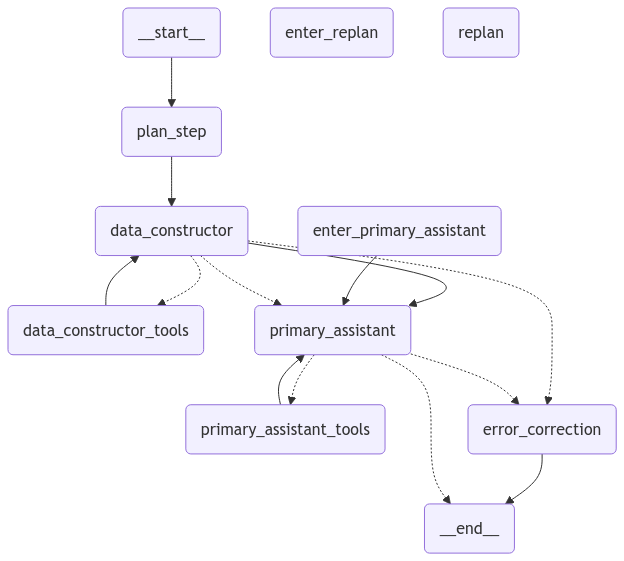

In [6]:

part_4_graph = builder.compile(
    checkpointer=memory,
)

from IPython.display import Image, display

display(Image(part_4_graph.get_graph(xray=True).draw_mermaid_png()))
